# Capstone Project - The Battle of Neighborhoods

## Table of contents:
* [Introduction:](#introduction)
* [Problem:](#problem)
* [Data Section:](#data)
* [Methodology:](#meto)

## Introduction: <a name="introduction"></a>

The main goal of this project is to gather information in order to recommend a newly contractor the best area in the city of Porto to open an hotel.

Porto or Oporto, is the second-largest city in Portugal, one of the Iberian Peninsula's major urban areas. Oporto city has a population of 237,559 and a metropolitan area with 2.4 million people (2019) in an area of 2,395 km2 (925 sq mi), making it the second-largest urban area in Portugal. It is recognized as a gamma-level global city by the Globalization and World Cities (GaWC) Study Group, the only Portuguese city besides Lisbon to be recognised as a global city.

Located along the Douro River estuary in northern Portugal, Oporto is one of the oldest European centres, and its core was proclaimed a World Heritage Site by UNESCO in 1996, as "Historic Centre of Oporto, Luiz I Bridge and Monastery of Serra do Pilar". The historic area is also a National Monument of Portugal. The western part of its urban area extends to the coastline of the Atlantic Ocean. Its settlement dates back many centuries, when it was an outpost of the Roman Empire. Its combined Celtic-Latin name, Portus Cale, has been referred to as the origin of the name Portugal, based on transliteration and oral evolution from Latin. In Portuguese, the name of the city includes a definite article: o Porto ("the port"), which is where its English name "Oporto" comes from.

Port wine, one of Portugal's most famous exports, is named after Oporto, since the metropolitan area, and in particular the cellars of Vila Nova de Gaia, were responsible for the packaging, transport, and export of fortified wine. In 2014 and 2017, Oporto was elected The Best European Destination by the Best European Destinations Agency. Oportois on the Portuguese Way path of the Camino de Santiago. Oporto is also the home of one of the world's most successful football clubs, FC Porto.

Tourism in Porto has grown widely in recent years. The city has to offer not only a spectacular gastronomic but cultural experience. Vast kilometers of beaches and lots of activities that allowed tourists to have fun and relax during their holidays. 

## Problem: <a name="problem"></a>

With all this, the demand and competition in business has also increased. Finding the best are to place a new hotel in town by answering the following:
1. Areas with the most hotels
3. Areas with most restaurants 
4. Areas with the most museums/attractions to visit

## Data Section: <a name=data></a>

For this project we will be using the following data:
* Canada data with the different Boroughs, latitude and longitude.
    * Data source with Portuguese boroughs and geospatial information: https://simplemaps.com/data/pt-cities
* Venues information in each neighborhood of Porto:
    * Data source: Foursquare API

## Methodology: <a name=meto></a>

**1. Download all the dependencies:**

In [44]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


**2. Data Extraction and Cleaning**

In [45]:
# The code was removed by Watson Studio for sharing.

,Borough,Parish,Latitude,Longitude
0,Porto,Bonfim,41.151070,-8.593957
1,Porto,Campanhã,41.159674,-8.576985
2,Porto,Paranhos,41.173513,-8.605900
3,Porto,Ramalde,41.169962,-8.643317
4,Porto,"União das freguesias de Aldoar, Foz do Douro e...",41.161152,-8.675639
5,Porto,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174
6,Porto,União das freguesias de Lordelo do Ouro e Mass...,41.151706,-8.641936


**3. Get Latitude and Longitude of Porto:**

In [46]:
address = 'Porto'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Porto are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.18.1" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  app.launch_new_instance()


The geograpical coordinate of Porto are 41.1494512, -8.6107884.


**4. Create a map of Porto Parishes:**

In [47]:
# create map of Porto using latitude and longitude values
map_Porto = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, Borough, Parish in zip(df_porto['Latitude'], df_porto['Longitude'], df_porto['Borough'], df_porto['Parish']):
    label = '{}, {}'.format(Borough, Parish)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Porto)  
    
map_Porto 

**5. Define Foursquare Credentials and Version:**

In [48]:
CLIENT_ID = 'GGBGTXWOJT3JVYJZJJOXOGIIS3T014TIZIR20UUD0GJ05KC2' # your Foursquare ID
CLIENT_SECRET = 'WNIU5DS3GVY4HJAXFMJDIWKDNISKDQHVXFPCEO4MPVAODGT4' # your Foursquare Secret
VERSION = '20200608' # Foursquare API version

**6. Explore Porto's venues:**

In [49]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 1000 # define radius
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Parish', 
                  'Parish Latitude', 
                  'Parish Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [50]:
# write the code to run the above function
Porto_venues = getNearbyVenues(names=df_porto['Parish'],
                                  latitudes=df_porto['Latitude'],
                                  longitudes=df_porto['Longitude'])

Bonfim
Campanhã
Paranhos
Ramalde
União das freguesias de Aldoar, Foz do Douro e Nevogilde
União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória
União das freguesias de Lordelo do Ouro e Massarelos


In [51]:
Porto_venues.shape

(502, 7)

In [52]:
Porto_venues.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bonfim,41.15107,-8.593957,Mesa 325,41.148224,-8.597471,Coffee Shop
1,Bonfim,41.15107,-8.593957,Suribachi Centro Macrobiotico,41.149043,-8.597248,Vegetarian / Vegan Restaurant
2,Bonfim,41.15107,-8.593957,A Cozinha do Manel,41.146196,-8.592846,Portuguese Restaurant
3,Bonfim,41.15107,-8.593957,Eurostars do Heroísmo,41.146280,-8.593437,Hotel
4,Bonfim,41.15107,-8.593957,Manuel Alves,41.156655,-8.594456,Restaurant


In [53]:
venues_count=Porto_venues.groupby('Parish').count()
venues_count

,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Parish,,,,,,
Bonfim,98,98,98,98,98,98
Campanhã,43,43,43,43,43,43
Paranhos,48,48,48,48,48,48
Ramalde,56,56,56,56,56,56
"União das freguesias de Aldoar, Foz do Douro e Nevogilde",71,71,71,71,71,71
"União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória",100,100,100,100,100,100
União das freguesias de Lordelo do Ouro e Massarelos,86,86,86,86,86,86


In [54]:
print('There are {} uniques categories.'.format(len(Porto_venues['Venue Category'].unique())))

There are 130 uniques categories.


In [55]:
Porto_venues['Venue Category'].unique()

array(['Coffee Shop', 'Vegetarian / Vegan Restaurant',
       'Portuguese Restaurant', 'Hotel', 'Restaurant', 'Cocktail Bar',
       'Brewery', 'Snack Place', 'Sandwich Place', 'Wine Bar',
       'Spanish Restaurant', 'Beer Bar', 'Café', 'Church', 'Hostel',
       'Burger Joint', 'BBQ Joint', 'Seafood Restaurant',
       'Sporting Goods Shop', 'Tea Room', 'Gastropub', 'Clothing Store',
       'Indian Restaurant', 'Gym / Fitness Center', 'Bakery',
       'Brazilian Restaurant', 'Plaza', 'Nightclub', 'Dive Bar', 'Market',
       'Sushi Restaurant', 'Pizza Place', 'Salad Place', 'Ice Cream Shop',
       'Grocery Store', 'Motel', 'Theater', 'Dessert Shop',
       'Train Station', 'Boarding House', 'Platform', 'Museum',
       'Soccer Stadium', 'Hockey Arena', 'Fast Food Restaurant',
       "Men's Store", 'Bookstore', 'Park', 'Gym', 'Shopping Mall',
       'Garden', 'Noodle House', 'Italian Restaurant',
       'Health Food Store', 'Movie Theater', 'Supermarket', 'Gym Pool',
       'Miscella

**7. Top 5 venues per Parish:**

In [56]:
# one hot encoding
porto_onehot = pd.get_dummies(Porto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
porto_onehot['Parish'] = Porto_venues['Parish'] 

# move neighborhood column to the first column
fixed_columns = [porto_onehot.columns[-1]] + list(porto_onehot.columns[:-1])
porto_onehot =porto_onehot[fixed_columns]

porto_onehot.head()

,Parish,African Restaurant,Argentinian Restaurant,Art Gallery,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Café,Candy Store,Casino,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Creperie,Dessert Shop,Diner,Dive Bar,Dutch Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Furniture / Home Store,Garden,Gas Station,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Heliport,Historic Site,History Museum,Hockey Arena,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Light Rail Station,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Miscellaneous Shop,Monument / Landmark,Motel,Movie Theater,Museum,Nature Preserve,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Rental Car Location,Restaurant,River,Rock Climbing Spot,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery
0,Bonfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Bonfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,Bonfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Bonfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Bonfim,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
porto_grouped = porto_onehot.groupby('Parish').mean().reset_index()
porto_grouped.head()

,Parish,African Restaurant,Argentinian Restaurant,Art Gallery,Automotive Shop,BBQ Joint,Bakery,Bar,Basketball Court,Beach,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bistro,Boarding House,Boat or Ferry,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,Bridge,Building,Burger Joint,Bus Station,Café,Candy Store,Casino,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comfort Food Restaurant,Creperie,Dessert Shop,Diner,Dive Bar,Dutch Restaurant,Electronics Store,Event Space,Fast Food Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Furniture / Home Store,Garden,Gas Station,Gastropub,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Heliport,Historic Site,History Museum,Hockey Arena,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Karaoke Bar,Light Rail Station,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Metro Station,Miscellaneous Shop,Monument / Landmark,Motel,Movie Theater,Museum,Nature Preserve,Neighborhood,Nightclub,Nightlife Spot,Noodle House,Optical Shop,Park,Pastry Shop,Pedestrian Plaza,Pharmacy,Pier,Pizza Place,Planetarium,Platform,Playground,Plaza,Portuguese Restaurant,Pub,Rental Car Location,Restaurant,River,Rock Climbing Spot,Roof Deck,Salad Place,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shop & Service,Shopping Mall,Snack Place,Soccer Field,Soccer Stadium,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Supermarket,Sushi Restaurant,Tapas Restaurant,Taverna,Tea Room,Tennis Court,Theater,Trail,Train Station,Vegetarian / Vegan Restaurant,Waterfront,Wine Bar,Wine Shop,Winery
0,Bonfim,0.0,0.0,0.0,0.000000,0.030612,0.071429,0.000000,0.000000,0.000000,0.010204,0.000000,0.0,0.000000,0.010204,0.0,0.000000,0.010204,0.0,0.010204,0.0,0.0,0.020408,0.000000,0.122449,0.000000,0.0,0.010204,0.010204,0.010204,0.051020,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.010204,0.000000,0.010204,0.000000,0.010204,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.030612,0.061224,0.000000,0.000000,0.010204,0.010204,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.010204,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.010204,0.000000,0.000000,0.0,0.0,0.020408,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.010204,0.0,0.030612,0.000000,0.020408,0.112245,0.000000,0.0,0.132653,0.0,0.0,0.000000,0.010204,0.010204,0.0,0.010204,0.000000,0.000000,0.010204,0.000000,0.000000,0.000000,0.010204,0.010204,0.0,0.000000,0.010204,0.000000,0.0,0.010204,0.000000,0.010204,0.000000,0.010204,0.010204,0.0,0.010204,0.000000,0.0
1,Campanhã,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.023256,0.000000,0.0,0.000000,0.0,0.0,0.023256,0.000000,0.046512,0.000000,0.0,0.000000,0.069767,0.000000,0.046512,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.023256,0.0,0.023256,0.0,0.000000,0.0,0.023256,0.023256,0.023256,0.000000,0.000000,0.000000,0.023256,0.023256,0.023256,0.023256,0.023256,0.0,0.000000,0.0,0.023256,0.000000,0.023256,0.000000,0.000000,0.000000,0.000000,0.000000,0.023256,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.023256,0.023256,0.023256,0.0,0.000000,0.023256,0.023256,0.0,0.0,0.000000,0.0,0.023256,0.0,0.023256,0.0,0.0,0.023256,0.0,0.023256,0.0,0.000000,0.000000,0.000000,0.023256,0.000000,0.0,0.046512,0.0,0.0,0.000000,0.023256,0.046512,0.0,0.000000,0.000000,0.023256,0.023256,0.000000,0.023256,0.000000,0.000000,0.023256,0.0,0.023256,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,Paranhos,0.0,0.0,0.0,0.000000,0.041667,0.062500,0.083333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.020833,0.0,0.000000,0.0,0.0,0.020833,0.000000,0.104167,0.020833,0.0,0.000000,0.000000,0.000000,0.041667,0.041667,0.020833,0.000000,0.000000,0.000000,0.000000,0.0,0.

In [58]:
num_top_venues = 5

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Parish']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
porto_venues_sorted = pd.DataFrame(columns=columns)
porto_venues_sorted['Parish'] = porto_grouped['Parish']

for ind in np.arange(porto_grouped.shape[0]):
    porto_venues_sorted.iloc[ind, 1:] = return_most_common_venues(porto_grouped.iloc[ind, :], num_top_venues)

porto_venues_sorted.head()

,Parish,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bonfim,Restaurant,Café,Portuguese Restaurant,Bakery,Hotel
1,Campanhã,Clothing Store,Coffee Shop,Café,Sandwich Place,Restaurant
2,Paranhos,Supermarket,Café,Bar,Bakery,Portuguese Restaurant
3,Ramalde,Café,Supermarket,Soccer Field,Portuguese Restaurant,Bakery
4,"União das freguesias de Aldoar, Foz do Douro e...",Beach,Restaurant,Café,Bakery,Bar


**8. Clustering Parishes:**

In [59]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

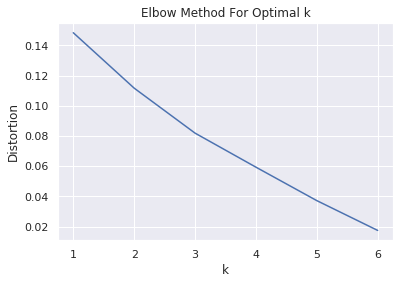

In [60]:
sns.set(style="darkgrid")
porto_grouped_clustering = porto_grouped.drop('Parish', 1)

Distortions = []
K = range (1,7)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(porto_grouped_clustering)
    Distortions.append(km.inertia_)
                
plt.plot(K, Distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method For Optimal k')
plt.show()

Because we cannot take any conclusions with the elbow method above, k=3 were defined:

In [79]:
# set number of clusters
kclusters = 4

porto_grouped_clustering = porto_grouped.drop('Parish', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(porto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 3, 2, 2, 0, 1, 1], dtype=int32)

In [80]:
porto_merged = df_porto

# add clustering labels
porto_merged['Cluster Labels'] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
porto_merged = porto_merged.join(porto_venues_sorted.set_index('Parish'), on='Parish')

porto_merged.head() # check the last columns!

,Borough,Parish,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Porto,Bonfim,41.151070,-8.593957,1,Restaurant,Café,Portuguese Restaurant,Bakery,Hotel
1,Porto,Campanhã,41.159674,-8.576985,3,Clothing Store,Coffee Shop,Café,Sandwich Place,Restaurant
2,Porto,Paranhos,41.173513,-8.605900,2,Supermarket,Café,Bar,Bakery,Portuguese Restaurant
3,Porto,Ramalde,41.169962,-8.643317,2,Café,Supermarket,Soccer Field,Portuguese Restaurant,Bakery
4,Porto,"União das freguesias de Aldoar, Foz do Douro e...",41.161152,-8.675639,0,Beach,Restaurant,Café,Bakery,Bar


In [81]:
porto_merged.shape

(7, 10)

In [82]:
porto_merged.loc[porto_merged['Cluster Labels'] == 1, porto_merged.columns[[1] + list(range(5, porto_merged.shape[1]))]]


,Parish,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Bonfim,Restaurant,Café,Portuguese Restaurant,Bakery,Hotel
5,"União das freguesias de Cedofeita, Santo Ildef...",Portuguese Restaurant,Tapas Restaurant,Plaza,Winery,Hostel
6,União das freguesias de Lordelo do Ouro e Mass...,Portuguese Restaurant,Hotel,Bakery,Restaurant,Supermarket


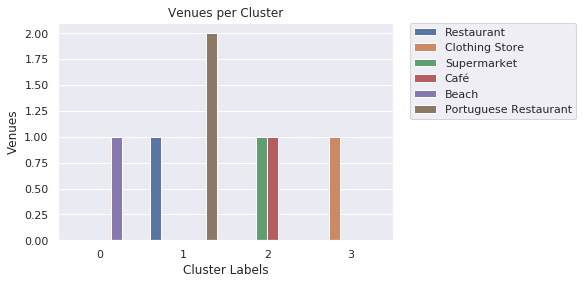

In [83]:
sns.set(style="darkgrid")
clusters_chart = sns.countplot(data=porto_merged, x='Cluster Labels', hue='1st Most Common Venue')
#clusters_chart.set_xticklabels(venues_chart.get_xticklabels(), rotation=90)
clusters_chart.set_ylabel('Venues')
clusters_chart.set_title('Venues per Cluster')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [84]:
#porto_merged.drop(['Cluster Label'], axis=1, inplace=True)
labels = []

for row in porto_merged['Cluster Labels']:
    if row == 0 : labels.append('Beach')
    elif row == 1: labels.append('Restaurants')
    elif row == 1: labels.append('Coffee shops and Groceries')  
    else: labels.append('Shopping')

porto_merged['Cluster Name'] = labels
porto_merged.head()

,Borough,Parish,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,Cluster Name
0,Porto,Bonfim,41.151070,-8.593957,1,Restaurant,Café,Portuguese Restaurant,Bakery,Hotel,Restaurants
1,Porto,Campanhã,41.159674,-8.576985,3,Clothing Store,Coffee Shop,Café,Sandwich Place,Restaurant,Shopping
2,Porto,Paranhos,41.173513,-8.605900,2,Supermarket,Café,Bar,Bakery,Portuguese Restaurant,Shopping
3,Porto,Ramalde,41.169962,-8.643317,2,Café,Supermarket,Soccer Field,Portuguese Restaurant,Bakery,Shopping
4,Porto,"União das freguesias de Aldoar, Foz do Douro e...",41.161152,-8.675639,0,Beach,Restaurant,Café,Bakery,Bar,Beach


**9 Map with clusters categories:**

In [85]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, name in zip(porto_merged['Latitude'], porto_merged['Longitude'], 
                                  porto_merged['Parish'], 
                                  porto_merged['Cluster Labels'],
                                  porto_merged['Cluster Name']):
    label = folium.Popup(str(poi) +  '-' + ' Cluster: ' + str(name), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
#folium.Marker([lat, lon]).add_to(map_clusters)
folium.Circle([lat, lon], radius=2000, fill=False, color='white').add_to(map_clusters)
folium.Circle([lat, lon], radius=4000, fill=False, color='white').add_to(map_clusters)
folium.Circle([lat, lon], radius=6000, fill=False, color='white').add_to(map_clusters)
folium.Circle([lat, lon], radius=8000, fill=False, color='black').add_to(map_clusters) 
       
       
map_clusters

**10. Venues per parish:**

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 1.0, 'Venues per Parish in Porto')

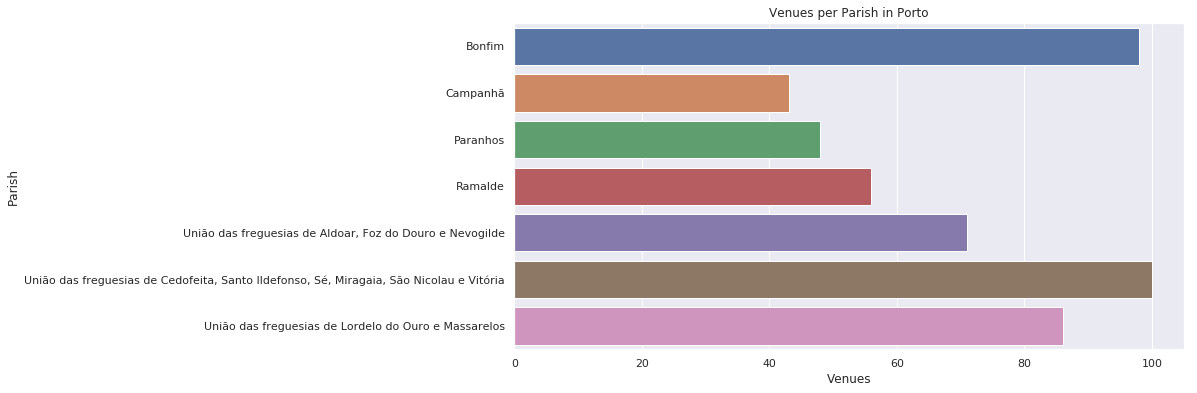

In [87]:
figure(figsize=(12,6))
venues_chart = sns.countplot(data=Porto_venues, y='Parish')
#venues_chart.set_xticklabels(venues_chart.get_xticklabels(), rotation=90)
venues_chart.set_xlabel('Venues')
venues_chart.set_title('Venues per Parish in Porto')

From the previous chart we can see that União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória and Bonfim are the parishes with the most venues. Let's check it in detail.

**11. Parishes of interest:**

**Heat map of venues in Porto in the 2 parishes of interest:**:

In [91]:
from folium.plugins import HeatMap
# create map
map_venues = folium.Map(location=[latitude, longitude], zoom_start=11)
locations1 = df_interest[['Venue Latitude','Venue Longitude']]
locationlist1 = locations1.values.tolist()
locationlist1 = [[float(lat),float(lon)] for [lat,lon] in locationlist1]
HeatMap(locationlist1).add_to(map_venues)

locations2 = df_bf[['Venue Latitude','Venue Longitude']]
locationlist2 = locations2.values.tolist()
locationlist2 = [[float(lat),float(lon)] for [lat,lon] in locationlist2]
HeatMap(locationlist2).add_to(map_venues)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
    
    
folium.Marker([lat, lon]).add_to(map_venues)
folium.Circle([lat, lon], radius=2000, fill=False, color='white').add_to(map_venues)
folium.Circle([lat, lon], radius=4000, fill=False, color='white').add_to(map_venues)
folium.Circle([lat, lon], radius=6000, fill=False, color='white').add_to(map_venues)
folium.Circle([lat, lon], radius=8000, fill=False, color='black').add_to(map_venues) 

map_venues

**A. União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória:**

In [92]:
df_interest=Porto_venues[Porto_venues['Parish'].str.contains('União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória')].reset_index(drop=True)
df_interest.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174,Taberna dos Mercadores,41.141349,-8.613050,Portuguese Restaurant
1,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174,Wine Quay Bar,41.140241,-8.614164,Tapas Restaurant
2,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174,Bluesock Hostels Porto,41.141405,-8.613346,Hostel
3,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174,Praça da Ribeira,41.140608,-8.613022,Plaza
4,"União das freguesias de Cedofeita, Santo Ildef...",41.140242,-8.615174,Fonte do Cubo,41.140605,-8.613011,Plaza


In [93]:
df_interest.shape

(100, 7)

Text(0.5, 1.0, 'Venues in União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória')

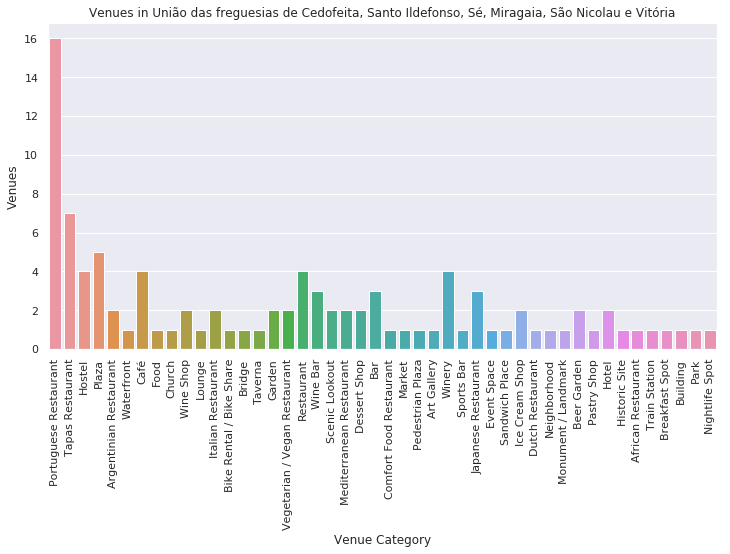

In [90]:
figure(figsize=(12,6))
chart = sns.countplot(data=df_interest, x='Venue Category')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart.set_ylabel('Venues')
chart.set_title('Venues in União das freguesias de Cedofeita, Santo Ildefonso, Sé, Miragaia, São Nicolau e Vitória')

In [94]:
df_interest.groupby('Venue Category').count()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
African Restaurant,1,1,1,1,1,1
Argentinian Restaurant,2,2,2,2,2,2
Art Gallery,1,1,1,1,1,1
Bar,3,3,3,3,3,3
Beer Garden,2,2,2,2,2,2
Bike Rental / Bike Share,1,1,1,1,1,1
Breakfast Spot,1,1,1,1,1,1
Bridge,1,1,1,1,1,1
Building,1,1,1,1,1,1


**B. Bonfim:**

In [95]:
df_bf=Porto_venues[Porto_venues['Parish'].str.contains('Bonfim')].reset_index(drop=True)
df_bf.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bonfim,41.15107,-8.593957,Mesa 325,41.148224,-8.597471,Coffee Shop
1,Bonfim,41.15107,-8.593957,Suribachi Centro Macrobiotico,41.149043,-8.597248,Vegetarian / Vegan Restaurant
2,Bonfim,41.15107,-8.593957,A Cozinha do Manel,41.146196,-8.592846,Portuguese Restaurant
3,Bonfim,41.15107,-8.593957,Eurostars do Heroísmo,41.146280,-8.593437,Hotel
4,Bonfim,41.15107,-8.593957,Manuel Alves,41.156655,-8.594456,Restaurant


In [96]:
df_bf.shape

(98, 7)

Text(0.5, 1.0, 'Venues in Bonfim')

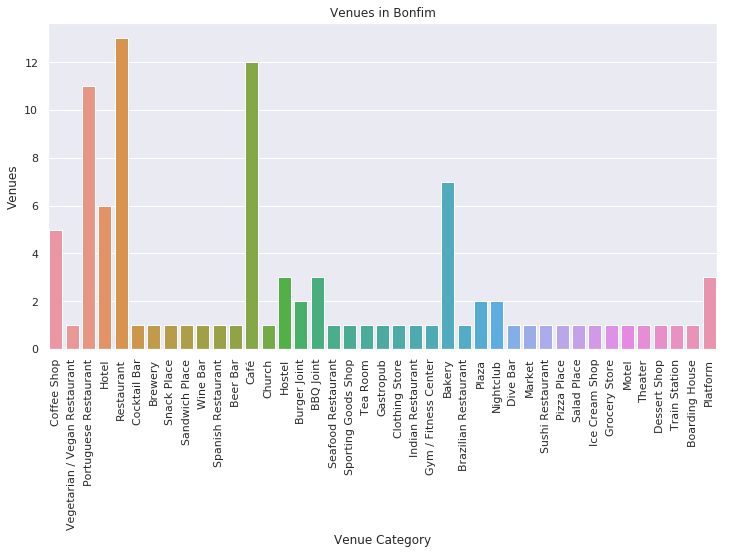

In [97]:
figure(figsize=(12,6))
chart_bf = sns.countplot(data=df_bf, x='Venue Category')
chart_bf.set_xticklabels(chart_bf.get_xticklabels(), rotation=90)
chart_bf.set_ylabel('Venues')
chart_bf.set_title('Venues in Bonfim')

In [98]:
df_bf.groupby('Venue Category').count()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
BBQ Joint,3,3,3,3,3,3
Bakery,7,7,7,7,7,7
Beer Bar,1,1,1,1,1,1
Boarding House,1,1,1,1,1,1
Brazilian Restaurant,1,1,1,1,1,1
Brewery,1,1,1,1,1,1
Burger Joint,2,2,2,2,2,2
Café,12,12,12,12,12,12
Church,1,1,1,1,1,1


**12. Accomodation per parish:**

In [99]:
hotels_porto=Porto_venues[Porto_venues['Venue Category'].str.contains('Hostel|Hotel|Motel')]
hotels_porto.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
3,Bonfim,41.15107,-8.593957,Eurostars do Heroísmo,41.146280,-8.593437,Hotel
6,Bonfim,41.15107,-8.593957,The Artist Porto Hotel and Bistro,41.151033,-8.601361,Hotel
19,Bonfim,41.15107,-8.593957,Porto Spot Hostel,41.153593,-8.605260,Hostel
44,Bonfim,41.15107,-8.593957,Decanting Porto,41.148783,-8.604362,Hotel
48,Bonfim,41.15107,-8.593957,acta the avenue,41.152275,-8.596676,Hotel


In [102]:
hotels_porto.reset_index(drop=True,inplace=True)
hotels_porto.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bonfim,41.15107,-8.593957,Eurostars do Heroísmo,41.146280,-8.593437,Hotel
1,Bonfim,41.15107,-8.593957,The Artist Porto Hotel and Bistro,41.151033,-8.601361,Hotel
2,Bonfim,41.15107,-8.593957,Porto Spot Hostel,41.153593,-8.605260,Hostel
3,Bonfim,41.15107,-8.593957,Decanting Porto,41.148783,-8.604362,Hotel
4,Bonfim,41.15107,-8.593957,acta the avenue,41.152275,-8.596676,Hotel


Let's see it in a barchart for better understanding of the accomodation options in the different parishes:

Text(0.5, 1.0, 'Accommodation per Parish')

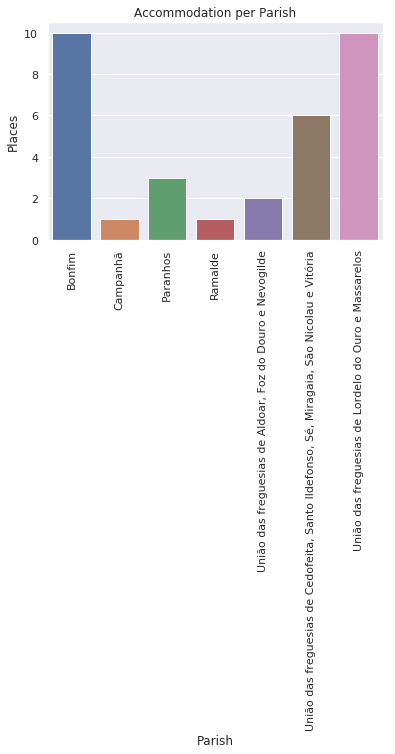

In [118]:
hotels_chart = sns.countplot(data=hotels_porto, x='Parish')
hotels_chart.set_xticklabels(hotels_chart.get_xticklabels(), rotation=90)
hotels_chart.set_ylabel('Places')
hotels_chart.set_title('Accommodation per Parish')

From the previous chart we can see that Bonfim is the parish with more accomodations options.

**Heat map of Accomodations in Porto:**

In [107]:
from folium.plugins import HeatMap
# create map
map_hotels = folium.Map(location=[latitude, longitude], zoom_start=11)
locationsh = hotels_porto[['Venue Latitude','Venue Longitude']]
locationlisth = locationsh.values.tolist()
locationlisth = [[float(lat),float(lon)] for [lat,lon] in locationlisth]
HeatMap(locationlisth).add_to(map_hotels)

# add markers to map
for lat, lng, Borough, Parish in zip(df_porto['Latitude'], df_porto['Longitude'], df_porto['Borough'], df_porto['Parish']):
    label = '{}, {}'.format(Borough, Parish)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hotels) 

    
folium.Marker([lat, lon]).add_to(map_hotels)
folium.Circle([lat, lon], radius=2000, fill=False, color='white').add_to(map_hotels)
folium.Circle([lat, lon], radius=4000, fill=False, color='white').add_to(map_hotels)
folium.Circle([lat, lon], radius=6000, fill=False, color='white').add_to(map_hotels)
folium.Circle([lat, lon], radius=8000, fill=False, color='black').add_to(map_hotels) 

map_hotels

In [365]:
venues = Porto_venues.groupby('Parish').count()
venues = pd.DataFrame(venues,columns=['Venue','Parish Latitude','Parish Longitude'])  # remove unneeded columns
venues.reset_index(inplace=True)   # default index, otherwise groupby column becomes index
venues.rename(columns={'Venue':'Count'}, inplace=True)
venues.sort_values(by='Count', inplace=True, ascending=False)
venues

,Parish,Count,Parish Latitude,Parish Longitude
5,"União das freguesias de Cedofeita, Santo Ildef...",100,100,100
0,Bonfim,98,98,98
6,União das freguesias de Lordelo do Ouro e Mass...,84,84,84
4,"União das freguesias de Aldoar, Foz do Douro e...",69,69,69
3,Ramalde,57,57,57
2,Paranhos,52,52,52
1,Campanhã,41,41,41


**13. Food Places per Parish:**

In [108]:
food_porto=Porto_venues[Porto_venues['Venue Category'].str.contains('Restaurant|Food|Pastry|Dessert|Salad|Pizza')]
food_porto.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Bonfim,41.15107,-8.593957,Suribachi Centro Macrobiotico,41.149043,-8.597248,Vegetarian / Vegan Restaurant
2,Bonfim,41.15107,-8.593957,A Cozinha do Manel,41.146196,-8.592846,Portuguese Restaurant
4,Bonfim,41.15107,-8.593957,Manuel Alves,41.156655,-8.594456,Restaurant
5,Bonfim,41.15107,-8.593957,Nova Era,41.146940,-8.596478,Restaurant
11,Bonfim,41.15107,-8.593957,Pedro Limão,41.146764,-8.601394,Portuguese Restaurant


Text(0.5, 1.0, 'Food Places per Parish')

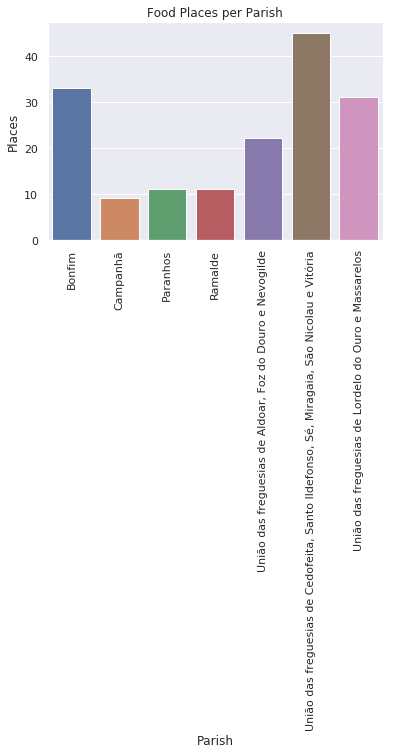

In [119]:
food_chart = sns.countplot(data=food_porto, x='Parish')
food_chart.set_xticklabels(food_chart.get_xticklabels(), rotation=90)
food_chart.set_ylabel('Places')
food_chart.set_title('Food Places per Parish')

**Heatmap of Food places:**

In [110]:
# create map
map_food = folium.Map(location=[latitude, longitude], zoom_start=11)
locationsf = food_porto[['Venue Latitude','Venue Longitude']]
locationlistf = locationsf.values.tolist()
locationlistf = [[float(lat),float(lon)] for [lat,lon] in locationlistf]
HeatMap(locationlisth).add_to(map_food)

# add markers to map
for lat, lng, Borough, Parish in zip(df_porto['Latitude'], df_porto['Longitude'], df_porto['Borough'], df_porto['Parish']):
    label = '{}, {}'.format(Borough, Parish)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_food) 

    
#folium.Marker([lat, lon]).add_to(map_hotels)
folium.Circle([lat, lon], radius=2000, fill=False, color='white').add_to(map_food)
folium.Circle([lat, lon], radius=4000, fill=False, color='white').add_to(map_food)
folium.Circle([lat, lon], radius=6000, fill=False, color='white').add_to(map_food)
folium.Circle([lat, lon], radius=8000, fill=False, color='black').add_to(map_food) 

map_food

**14. Places of interest to visit:**

In [120]:
visit_porto=Porto_venues[Porto_venues['Venue Category'].str.contains('Church|Theater|Movie|Historic|Event|Waterfront|Park|Winery|Scenic|Planetarium|River|Baeach|Casino|Monument|Stadium|Fiel|Trail|Garden|Train')]
visit_porto.head()

,Parish,Parish Latitude,Parish Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
18,Bonfim,41.151070,-8.593957,Capela das Almas,41.149846,-8.605589,Church
76,Bonfim,41.151070,-8.593957,Teatro Helena Sá E Costa,41.154448,-8.603913,Theater
79,Bonfim,41.151070,-8.593957,Estação Ferroviária de Porto-Campanhã,41.148701,-8.585304,Train Station
101,Campanhã,41.159674,-8.576985,Estádio do Dragão,41.161803,-8.583796,Soccer Stadium
107,Campanhã,41.159674,-8.576985,Praça da Corujeira,41.158631,-8.579477,Park


Text(0.5, 1.0, 'Places of interest to visit per Parish')

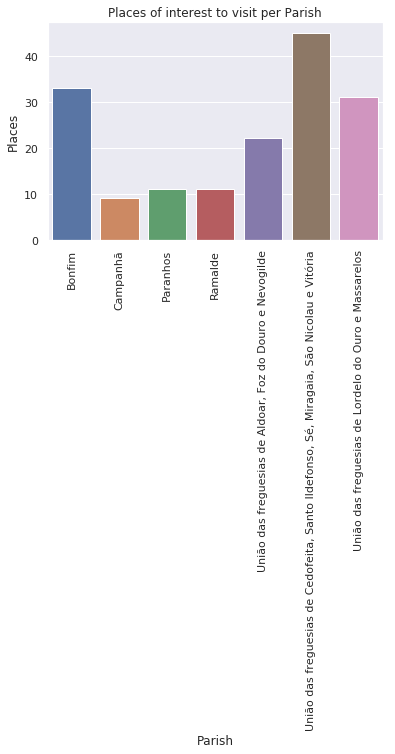

In [121]:
visit_chart = sns.countplot(data=food_porto, x='Parish')
visit_chart.set_xticklabels(visit_chart.get_xticklabels(), rotation=90)
visit_chart.set_ylabel('Places')
visit_chart.set_title('Places of interest to visit per Parish')

**Heatmap of places of interest to visit"**

In [122]:
# create map
map_visit = folium.Map(location=[latitude, longitude], zoom_start=11)
locationsp = visit_porto[['Venue Latitude','Venue Longitude']]
locationlistp = locationsp.values.tolist()
locationlistp = [[float(lat),float(lon)] for [lat,lon] in locationlistp]
HeatMap(locationlistp).add_to(map_visit)

# add markers to map
for lat, lng, Borough, Parish in zip(df_porto['Latitude'], df_porto['Longitude'], df_porto['Borough'], df_porto['Parish']):
    label = '{}, {}'.format(Borough, Parish)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_visit) 

    
#folium.Marker([lat, lon]).add_to(map_hotels)
folium.Circle([lat, lon], radius=2000, fill=False, color='white').add_to(map_visit)
folium.Circle([lat, lon], radius=4000, fill=False, color='white').add_to(map_visit)
folium.Circle([lat, lon], radius=6000, fill=False, color='white').add_to(map_visit)
folium.Circle([lat, lon], radius=8000, fill=False, color='black').add_to(map_visit) 

map_visit